In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

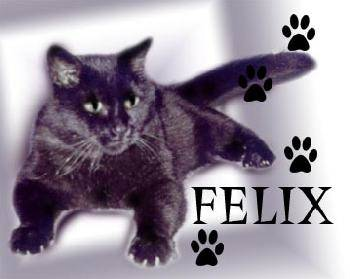

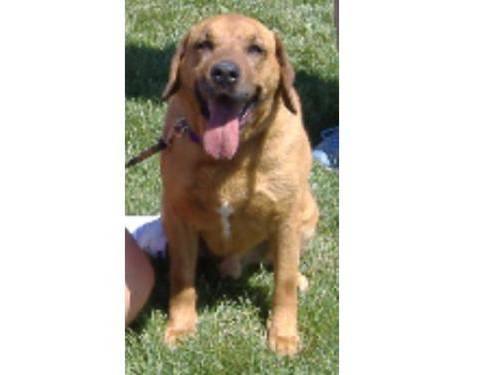

Dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will use 2000 pictures for training, 1000 for validation, and finally 1000 for testing

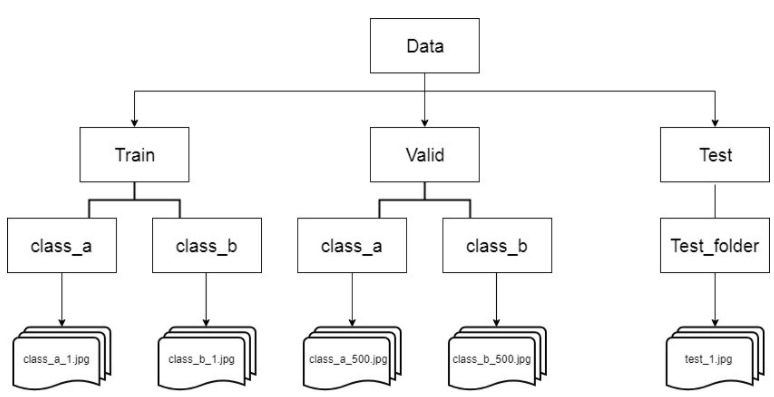

In [6]:
train_dir = r'C:\Users\yashp\Desktop\ML&DL\cats_and_dogs_small\train'
validation_dir = r'C:\Users\yashp\Desktop\ML&DL\cats_and_dogs_small\validation'
test_dir = r'C:\Users\yashp\Desktop\ML&DL\cats_and_dogs_small\test'

## Data Preprocessing
* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Generating batches of tensor image date
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                                   batch_size = 20, class_mode = 'binary')

#Since, we are using two folders or cat-dog folders so Binary Classification 
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150,150),
                                                       batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) # after this we'll have images of 75X75

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))# after this we'll have images of 37X37

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))# after this we'll have images of 18X18

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))# after this we'll have images of 9X9

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
# Image size should decrease with each conv layer as we go along the networks and 
# feature map height should increase as we go along the network

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), #lr - Learning rate of 0.0004
              metrics=['acc']) 
# RMS have little advantage over SGD in image processing

In [15]:
history = model.fit_generator( train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 68s 675ms/step - loss: 0.6881 - acc: 0.5435 - val_loss: 0.6841 - val_acc: 0.5390
Epoch 2/20
100/100 [==============================] - 66s 655ms/step - loss: 0.6564 - acc: 0.6090 - val_loss: 0.6340 - val_acc: 0.6320
Epoch 3/20
100/100 [==============================] - 67s 670ms/step - loss: 0.6005 - acc: 0.6710 - val_loss: 0.6117 - val_acc: 0.6660
Epoch 4/20
100/100 [==============================] - 65s 646ms/step - loss: 0.5575 - acc: 0.7215 - val_loss: 0.5830 - val_acc: 0.6910
Epoch 5/20
100/100 [==============================] - 64s 642ms/step - loss: 0.5138 - acc: 0.7530 - val_loss: 0.5645 - val_acc: 0.7100
Epoch 6/20
100/100 [==============================] - 64s 645ms/step - loss: 0.4845 - acc: 0.7670 - val_loss: 0.5789 - val_acc: 0.6980
Epoch 7/20
100/100 [==============================] - 65s 646ms/step - loss: 0.4568 - acc: 0.7985 - val_loss: 0.57

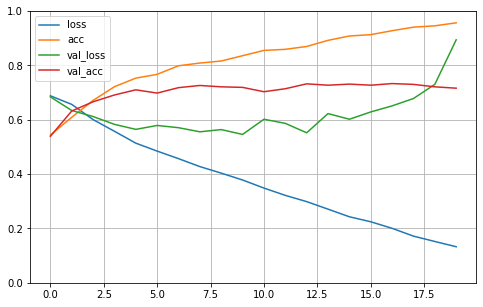

In [16]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [17]:
model.save("model.h5")

In [18]:
from tensorflow.keras import backend as k
k.clear_session()
del model